In [4]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt

In [5]:
# Load mesh, then sample points (if you start with a mesh)
pcd = o3d.io.read_point_cloud("filtered_point_cloud.ply")


In [18]:
labels = np.array(pcd.cluster_dbscan(eps=0.01, min_points=20, print_progress=True))

Precompute neighbors.[========================================] 100%
Clustering[========================================] 100%         ] 60%


Detected 2 clusters


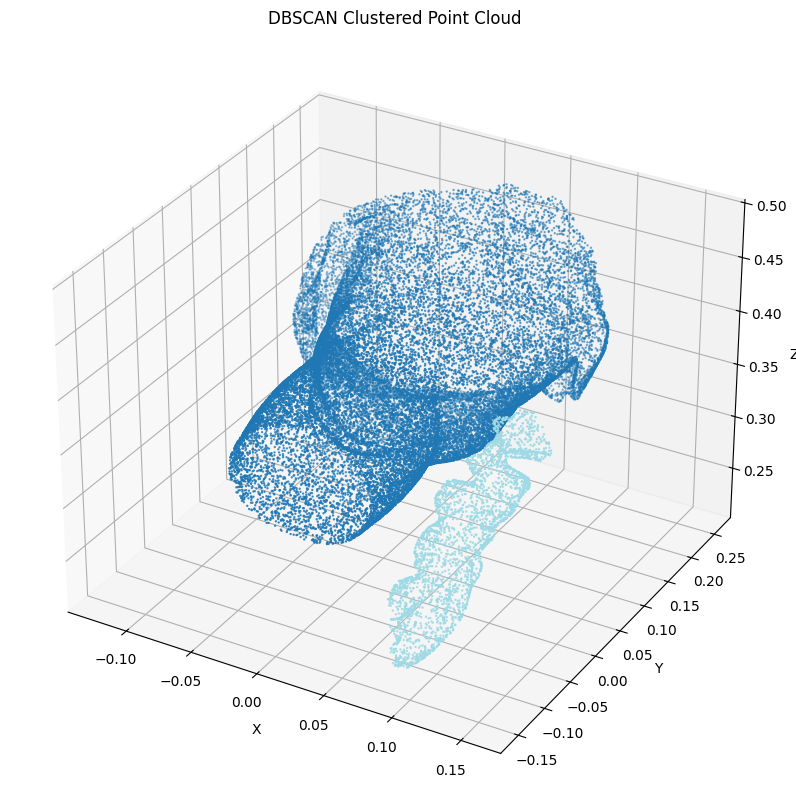

In [19]:
raw_points = np.asarray(pcd.points)

# If you already have labels:
# labels = np.array(pcd.cluster_dbscan(...))

max_label = labels.max()
print(f"Detected {max_label + 1} clusters")

# Use a colormap — use 'tab20' for up to 20 distinct colors
colors = plt.get_cmap('tab20')(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = [0, 0, 0, 1]  # Noise (label -1) is black

# Create matplotlib 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    raw_points[:, 0], raw_points[:, 1], raw_points[:, 2],
    c=colors, s=0.5
)

ax.set_title('DBSCAN Clustered Point Cloud')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Optional: adjust limits to fit your data
# ax.set_xlim(-0.5, 0.5)
# ax.set_ylim(-0.5, 0.5)
# ax.set_zlim(0, 1)

plt.show()

In [21]:
# Ignore noise label (-1)
unique_labels, counts = np.unique(labels[labels >= 0], return_counts=True)

# Find the largest cluster label
largest_cluster_label = unique_labels[np.argmax(counts)]

print(f"Largest cluster is label {largest_cluster_label} with {counts.max()} points.")


Largest cluster is label 0 with 29707 points.


In [24]:
# Get indices for points in largest cluster
indices = np.where(labels == largest_cluster_label)[0]

# Extract the cluster
largest_cluster = pcd.select_by_index(indices)


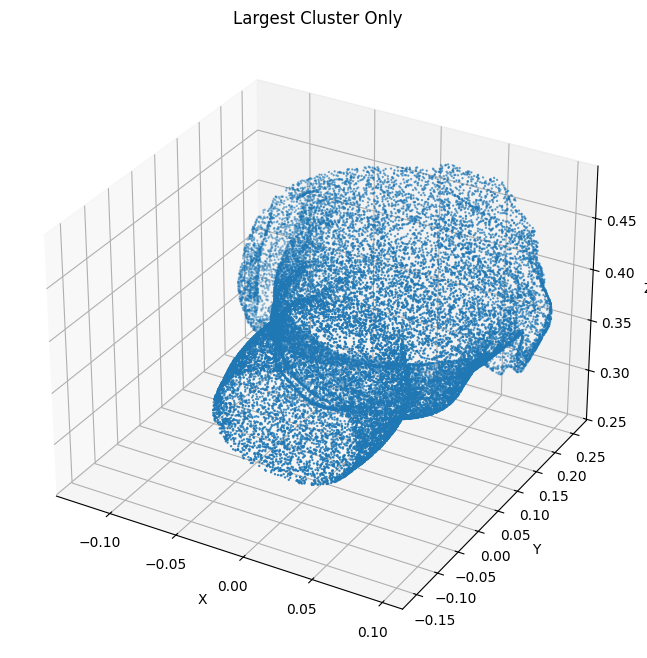

In [26]:
points = np.asarray(largest_cluster.points)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[:, 0], points[:, 1], points[:, 2],
           c='tab:blue', s=0.5)

ax.set_title('Largest Cluster Only')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
